# Pyoso Quickstart

Full getting started with pyoso guide is available here: https://docs.opensource.observer/docs/get-started/python/

In [1]:
#! pip install pyoso

In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
from pyoso import Client

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

In [3]:
# Helper function for inserting arrays into queries
def stringify(arr):
    return "'" + "','".join(arr) + "'"

# Run some initial queries just to explore the models available

In [4]:
# Get all models currently available on OSO
client.to_pandas("SELECT * FROM models_v0 LIMIT 5")

,model_id,model_name,rendered_sql,rendered_at
0,ljl3QhAYyCjbIDyMv8I8w/EEngeriSzh2VCuqEkzvWw=,int_events,"SELECT ""_q_0"".""time"" AS ""time"", ""_q_0"".""to...",2025-03-27 22:03:36.183
1,716lYxOD+JZfwxtZZWHyIAskMQ374xN1bj/NZLfCMUg=,int_events_to_project,"SELECT ""artifacts"".""project_id"" AS ""project_...",2025-03-27 22:03:37.154
2,GXSxn/3mNLCgnpYPVS3B33+zZvsuohG9uIussgocThI=,int_events_to_collection,"SELECT ""collections"".""collection_id"" AS ""col...",2025-03-27 22:03:36.501
3,nvV9CbM+w8wC2xfT9mS0uDbhE0fZBMUwpVGYJBFHr5s=,timeseries_events_by_artifact_v0,"SELECT ""int_events"".""time"" AS ""time"", ""int...",2025-03-27 22:03:31.519
4,IthHtw46eH4c0RT7czpDdkJM4XHkMWGR5Chfa5uTLNE=,int_events_daily_to_artifact_with_lag,"SELECT ""int_events_daily_to_artifact"".""bucke...",2025-03-27 22:03:36.422


In [5]:
# Get the list of v1 (stable) production models
client.to_pandas("SELECT * FROM models_v0 WHERE model_name LIKE '%_v1'")

,model_id,model_name,rendered_sql,rendered_at
0,HwiIdYd+DyWBfLGkM2y+8j7vZrMw9Ik0zzTQQHYh/4g=,artifacts_by_collection_v1,"SELECT ""int_artifacts_by_collection"".""artifa...",2025-07-01 00:24:07.193
1,vrv4YGCvh4se48QJiVctVgDaGhC+J9jAnaJmUPI9AuA=,collections_v1,"SELECT ""collections"".""collection_id"" AS ""col...",2025-07-01 00:24:06.872
2,/Pgs0Pew5D9hUb+PKtkyXWRb57vCu4H3DZMJQYzcxDo=,artifacts_v1,"SELECT ""int_artifacts"".""artifact_id"" AS ""art...",2025-07-01 00:24:08.459
3,BrMoDljk10fYeGJO+2vAZhxdZ4c9+ofkb3f52rBeoZo=,event_types_v1,"WITH ""all_event_types"" AS ( SELECT ""int_...",2025-07-01 00:24:09.453
4,O0RnB9Fs+aOrKFnhvZ6TaI1YS8EiJf3jRNcJw2KdxZY=,artifacts_by_project_v1,"SELECT ""int_artifacts_by_project"".""artifact_...",2025-07-01 00:24:08.774
5,laADUO2JV1w7TAV3IQHXK/01Vgir5FdBmSjqXy1jNew=,projects_by_collection_v1,"SELECT ""projects_by_collection"".""project_id""...",2025-07-01 00:24:08.149
6,cUe+fAo19qp+FCWtmTEIMjjyXKck+8w+mc6CqbrjZsQ=,projects_v1,"SELECT ""projects"".""project_id"" AS ""project_i...",2025-07-01 00:24:06.188


In [6]:
# Get the list of v0 (less stable) production models
client.to_pandas("SELECT * FROM models_v0 WHERE model_name LIKE '%_v0'")

,model_id,model_name,rendered_sql,rendered_at
0,nvV9CbM+w8wC2xfT9mS0uDbhE0fZBMUwpVGYJBFHr5s=,timeseries_events_by_artifact_v0,"SELECT ""int_events"".""time"" AS ""time"", ""int...",2025-03-27 22:03:31.519
1,XIANu9uAuvHsb70FOWyUPeiRb2lHqUm4wtrsb6fKoPw=,package_owners_v0,"SELECT DISTINCT ""int_sbom_artifacts"".""packag...",2025-07-01 00:24:07.817
2,I+AOCpwQiEnj6MuoN6aCFjTP+4VwKgbiPMQbkulHY5Y=,key_metrics_by_collection_v0,"WITH ""key_metrics_by_collection_v0_no_casting""...",2025-07-01 00:24:12.071
3,WUygDRNOE9wdvYtgHZwX0Wblsbe5A5zgYCUj0QUFrkY=,metrics_v0,/* TODO: We currenly hardcode a set of key met...,2025-07-01 00:24:10.506
4,Y9FZAHn+jE/tsXyT8u7y6JGlI69rTziq/s2QmBYhTVU=,timeseries_metrics_by_project_v0,"WITH ""all_key_metrics_by_project"" AS ( SELEC...",2025-07-01 00:24:09.792
5,PjBFaVMj8VuaIVo6YhuoN8R4NOOOned067UvHxFWOIo=,sboms_v0,"SELECT DISTINCT ""int_sbom_artifacts"".""projec...",2025-07-01 00:24:07.502
6,rLA15+4rZ/nqT/v+8krO2tgWSoH9TgmGb91CQHRqvt0=,repositories_v0,"SELECT ""int_repositories"".""project_id"" AS ""p...",2025-07-01 00:24:06.522
7,j++/Nb5HJcjMwW2AXVjRJry2Tldg59p199UqHHTXuV4=,timeseries_metrics_by_artifact_v0,"WITH ""all_key_metrics_by_artifact"" AS ( SELE...",2025-07-01 00:24:11.174
8,S4WOODykLnm2K50r7scrusXdV47UBfFezfOkOzVXvGs=,key_metrics_by_project_v0,"WITH ""key_metrics_by_project_v0_no_casting"" AS...",2025-07-01 00:24:11.568
9,E43QKNjOJMJb8SgW9GXT7BnnzVotJuDN4A8bbrVSqhU=,timeseries_metrics_by_collection_v0,"WITH ""all_key_metrics_by_collection"" AS ( SE...",2025-07-01 00:24:10.129


# Perform some queries on popular models

In [7]:
# Get a list of projects
client.to_pandas("SELECT * FROM projects_v1 LIMIT 5")

,project_id,project_source,project_namespace,project_name,display_name,description
0,u2urm5JyznGhe9dAIZjov/dTzkqInHdR6Uu8U1IGt1g=,OSS_DIRECTORY,oso,dontbuymeme,Meme,None
1,ZlLW+m2dTuzSPrAKsdbn9BTiIS120t3Ee5aVnJPnpl0=,OPENLABELSINITIATIVE,owner_project,dmail-ai,Dmail,None
2,B3u7YtSHRZqEfqka2KUelpEOubKnOXpUrOZzQUSiyn8=,OSS_DIRECTORY,oso,daolize,Daolize,None
3,PDsRx06kVn7ZlmxDSD2VHH2fREJsfLge6vJIEZLn2Pg=,OSS_DIRECTORY,oso,dripps-universe,Dripps Universe,None
4,v6P5Sf0JM3SOcgCSZEDbUiSRK1eUdtzANxwUY3fJByk=,OSS_DIRECTORY,oso,deltaport-io,Deltaport.io,None


In [8]:
# Lookup a specific project
client.to_pandas("SELECT * FROM projects_v1 WHERE project_name = 'opensource-observer'")

,project_id,project_source,project_namespace,project_name,display_name,description
0,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer,Open Source Observer,Open Source Observer is a free analytics suite...


In [9]:
# Get all artifacts owned by a project
df_abp = client.to_pandas("SELECT * FROM artifacts_by_project_v1 WHERE project_name = 'opensource-observer'")
df_abp

,artifact_id,artifact_source_id,artifact_source,artifact_namespace,artifact_name,project_id,project_source,project_namespace,project_name
0,LhaoMPKl19GmEcEtj6J36mAbBdtizsEvFNXsOwQ86Q0=,1025696465,GITHUB,opensource-observer,crypto-ecosystems,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
1,5pOzM/Vf333i7MXjJRSjfpticpmY4uK16uDDyFhjP+w=,0xc5bfce27e0e7a7d7731bc23b92ebc62b9ed63b83,OPTIMISM,,0xc5bfce27e0e7a7d7731bc23b92ebc62b9ed63b83,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
2,qYYB+4a+C+oGOB7l95yynPNtz8i6qaZGo5UdSObuhJc=,702906083,GITHUB,opensource-observer,test-public-repo,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
3,wAFCEJNQ4YPrs2Ev+DYUMM2/1DMT0Q1Zxa7aR1nWd1M=,875108565,GITHUB,opensource-observer,ethglobal-sf-2024,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
4,XGpq2zZsHiZbRLrEYibeOVMdBnNoWBTZalaRn9egwhI=,670784638,GITHUB,opensource-observer,oso,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
5,n+w2E3FSHG9x1TW0toVZwe/oPUBV/2JMhGlZy01yCG8=,853557673,GITHUB,opensource-observer,kariba,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
6,w19v911UyRmA4ngekB3BklxSreICA3xsV1tzbRaEMJA=,1037607407,GITHUB,opensource-observer,code-analyzer,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
7,kkCk4QuYCw0RldItqoBee7ccO0S9lsrZ/wgI4vGxKL4=,850138299,GITHUB,opensource-observer,sqlmesh,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
8,TjNKy/ib7R/sKbP6qiaQryccps8OGhOzwd/bPv0vFGg=,0x5cbd6362e6f222d2a0feb89f32566ebd27091b98,ARBITRUM_ONE,,0x5cbd6362e6f222d2a0feb89f32566ebd27091b98,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer
9,MJebS0B8hfqvMuF1Xp43dlR4WB5TzCyCaZ8YArOlgsk=,851248585,GITHUB,opensource-observer,sqlglot,UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk=,OSS_DIRECTORY,oso,opensource-observer


In [10]:
# Get available key metrics for OSO
client.to_pandas("""
  SELECT
    km.metric_id,
    m.metric_name,
    m.display_name,
    km.sample_date,
    km.amount,
    km.unit 
  FROM key_metrics_by_project_v0 AS km
  JOIN metrics_v0 AS m ON m.metric_id = km.metric_id
  WHERE km.project_id = 'UuWbpo5bpL5QsYvlukUWNm2uE8HFjxQxzCM0e+HMZfk='
""")

,metric_id,metric_name,display_name,sample_date,amount,unit
0,IBdxUvSrFquEY1PG3bYlD1LREqoRZxIHErDZDEAlM1M=,GITHUB_closed_issues_over_all_time,Closed Issues,2025-08-27,1586.0,None
1,LlWEoZ4fMf0t0K/y1ACobZ2YZoQSGRJ5HR1ccHNPve0=,GITHUB_issue_age_min_over_all_time,Minimum Issue Age,2025-08-27,0.0,None
2,k4WEQNTknJ3hJd+6r2aTRBX5KWO6qOKZheULoI6iePI=,OPTIMISM_gas_fees_internal_over_all_time,Gas Fees,2025-08-27,0.000043,None
3,fCurNzGHifHJShhc0wVn6SMz9ja/NBg7nXzIE8A9PIA=,OPTIMISM_transactions_over_all_time,Transactions,2025-08-27,38.0,None
4,+oh3g/WMjgzsGSrzo+y3gmaqX2+XMJaSga0afB/XVYY=,OPTIMISM_gas_fees_over_all_time,Gas Fees,2025-08-27,0.000042,None
5,I9hWPeDXHBhOI5A3irTvusF6QVmRJOTi8UxOyzq98qI=,GITHUB_releases_over_all_time,Releases,2025-08-27,7.0,None
6,yENOci1vNPlXyu75FDtgH6XUKIKZh1XfTSe+AEdwLTE=,GITHUB_repositories_over_all_time,Repositories,2025-08-27,15.0,None
7,SWVzafR98erPZpyulAj/TvAOKldOaGIOWWlTEhpnPV0=,GITHUB_project_velocity_over_all_time,Project Velocity,2025-08-27,6820.0,None
8,lLCZ3xP4lFADu98gKhyjFShzeG62v9pgKlcJWsPUaCs=,GITHUB_issue_age_max_over_all_time,Maximum Issue Age,2025-08-27,66084379.0,None
9,IZH+jgctXavirF4RMprmIciYlXZgIInZQRhkSJUu/uc=,GITHUB_issue_age_median_over_all_time,Median Issue Age,2025-08-27,437.950466,None


In [11]:
# Get a set of key metrics for a few projects using the stringify helper

MY_PROJECTS = ['opensource-observer', 'huggingface', 'wevm']
MY_METRICS = ['GITHUB_stars_over_all_time', 'GITHUB_forks_over_all_time']

client.to_pandas(f"""
  SELECT
    --p.project_id,
    --p.project_name,
    p.display_name AS project_display_name,
    --km.metric_id,
    --m.metric_name,
    m.display_name AS metric_display_name,
    km.sample_date,
    km.amount
    --km.unit 
  FROM key_metrics_by_project_v0 AS km
  JOIN metrics_v0 AS m ON m.metric_id = km.metric_id
  JOIN projects_v1 AS p ON p.project_id = km.project_id
  WHERE
    p.project_name IN ({stringify(MY_PROJECTS)})
    AND m.metric_name IN ({stringify(MY_METRICS)})
  ORDER BY p.display_name, m.display_name
""")

,project_display_name,metric_display_name,sample_date,amount
0,Hugging Face,Forks,2025-08-27,82907
1,Hugging Face,Stars,2025-08-27,499144
2,Open Source Observer,Forks,2025-08-27,265
3,Open Source Observer,Stars,2025-08-27,254
4,wevm,Forks,2025-08-27,1858
5,wevm,Forks,2025-08-27,1858
6,wevm,Forks,2025-08-27,1905
7,wevm,Stars,2025-08-27,5506
8,wevm,Stars,2025-08-27,5740
9,wevm,Stars,2025-08-27,5506


In [12]:
# Get timeseries metrics for OSO
df_stars = client.to_pandas("""
  SELECT
    tm.metric_id,
    m.metric_name,
    m.display_name,
    tm.sample_date,
    tm.amount,
    tm.unit 
  FROM timeseries_metrics_by_project_v0 AS tm
  JOIN metrics_v0 AS m ON m.metric_id = tm.metric_id
  JOIN projects_v1 AS p ON p.project_id = tm.project_id
  WHERE
    p.project_name = 'opensource-observer'
    AND m.metric_name = 'GITHUB_stars_daily'
  ORDER BY tm.sample_date
""")
df_stars

,metric_id,metric_name,display_name,sample_date,amount,unit
0,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-05,1,None
1,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-13,1,None
2,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-16,1,None
3,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-02,1,None
4,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-06,1,None
...,...,...,...,...,...,...
182,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-07-25,1,None
183,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-07-27,1,None
184,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-08-07,1,None
185,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-08-11,1,None


In [13]:
df_stars['cumulative_amount'] = df_stars['amount'].cumsum()
df_stars

,metric_id,metric_name,display_name,sample_date,amount,unit,cumulative_amount
0,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-05,1,None,1
1,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-13,1,None,2
2,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-10-16,1,None,3
3,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-02,1,None,4
4,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2023-11-06,1,None,5
...,...,...,...,...,...,...,...
182,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-07-25,1,None,250
183,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-07-27,1,None,251
184,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-08-07,1,None,252
185,eV94RLJgcpOd+aMt8Y0sYGyN4V+6CCSwuxyZC7B1/FE=,GITHUB_stars_daily,Stars,2025-08-11,1,None,253


<Axes: xlabel='sample_date'>

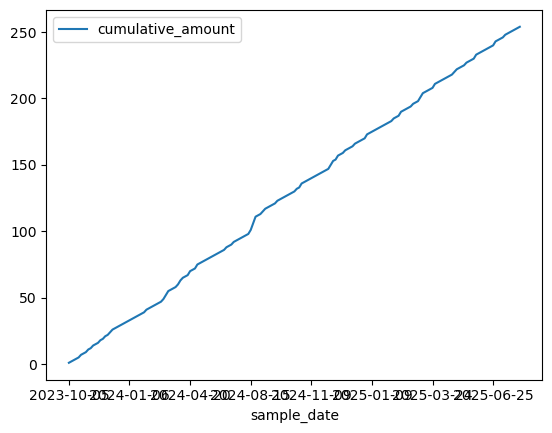

In [14]:
df_stars.plot(x='sample_date', y='cumulative_amount')

# View the lineage of a model

In [15]:
response = client.query("SELECT * FROM collections_v1")
tree = response.analytics
tree.print_tree()

└── sqlmesh.collections_v1 (Last: 2025-08-27 21:46:53)
    └── sqlmesh.int_collections (Last: 2025-08-27 21:46:53)
        ├── sqlmesh.int_projects_by_collection_in_defillama (Last: 2025-08-27 21:46:53)
        │   └── sqlmesh.int_artifacts_by_project_in_defillama (Last: 2025-08-27 21:46:53)
        │       └── sqlmesh.stg_defillama__protocol_metadata (Last: 2025-08-27 21:46:53)
        │           └── defillama.protocol_metadata (Last: 2025-08-29 09:52:32)
        ├── sqlmesh.int_projects_by_collection_in_op_atlas (Last: 2025-08-27 21:46:53)
        │   ├── sqlmesh.stg_op_atlas_application (Last: 2025-08-27 21:46:53)
        │   │   └── op_atlas.application (No analytics data)
        │   └── sqlmesh.stg_op_atlas_project (Last: 2025-08-27 21:46:53)
        │       └── op_atlas.project (No analytics data)
        ├── sqlmesh.int_projects_by_collection_in_openlabelsinitiative (Last: 2025-08-27 21:46:53)
        │   └── sqlmesh.int_artifacts_by_project_in_openlabelsinitiative (Last: 2025

In [16]:
# iterate through the first levels of a simple tree

for level1_node in tree.root_keys:    
    print("└──(1)", level1_node)
    for level2_node in tree.get(level1_node).dependencies:
        print("    └──(2)", level2_node)
        for level3_node in tree.get(level2_node).dependencies:
            print("        └──(3)", level3_node)

└──(1) sqlmesh.collections_v1
    └──(2) sqlmesh.int_collections
        └──(3) sqlmesh.int_projects_by_collection_in_defillama
        └──(3) sqlmesh.int_projects_by_collection_in_op_atlas
        └──(3) sqlmesh.int_projects_by_collection_in_openlabelsinitiative
        └──(3) sqlmesh.stg_ossd__current_collections
